## Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import sys
sys.path.insert(0, "./algorithms")
import bt, csp, dlx
from tqdm import tqdm
tqdm.pandas()

## Import Data

In [2]:
df = pd.read_csv("./data/NYTimes_Sudoku_Dataset.csv")
df = pd.melt(df[df.columns.difference(["Date"])], var_name="difficulty", value_name="sudoku")
df.head(5)

,difficulty,sudoku
0,Easy,"0,2,5,1,0,0,0,0,9,0,6,0,5,9,2,0,0,8,0,0,9,7,0,..."
1,Easy,"0,7,6,5,1,9,0,0,8,0,0,0,8,0,0,1,0,6,0,1,5,0,0,..."
2,Easy,"6,9,0,0,1,0,0,4,0,4,0,0,0,0,0,8,1,9,8,1,0,5,4,..."
3,Easy,"6,7,0,0,2,9,0,0,4,5,0,0,7,8,0,0,0,2,9,0,0,0,0,..."
4,Easy,"9,3,6,8,0,0,0,7,5,0,5,1,6,0,0,2,3,0,0,0,0,5,0,..."


## Helper Functions

In [3]:
def string_to_grid(s: str) -> list[list[int]]:
    """
    Converts a comma separated string representation of a sudoku `s` to a 9x9
    integer grid with 0s in unassigned cells.
    """
    ls: list[int] = list(map(int, s.split(",")))
    return [ls[r * 9 : (r + 1) * 9] for r in range(9)]

## Exploratory Data Analysis (EDA)

In [4]:
print(df["difficulty"].value_counts())

difficulty
Easy      711
Hard      711
Medium    711
Name: count, dtype: int64


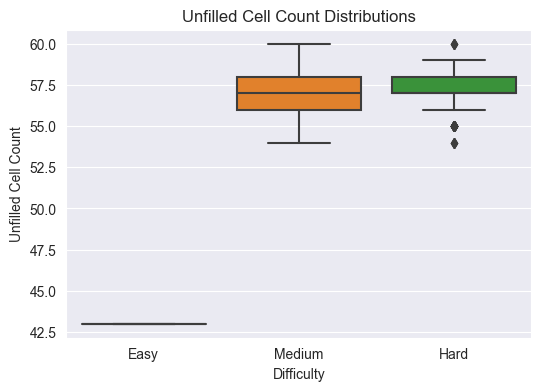

In [5]:
df["ucc"] = df["sudoku"].apply(lambda s: s.count("0"))

plt.figure(figsize=(6, 4))
ax = sns.boxplot(
    data=df,
    x="difficulty",
    y="ucc",
    order=["Easy", "Medium", "Hard"]
)
ret = ax.set(
    xlabel="Difficulty",
    ylabel="Unfilled Cell Count",
    title="Unfilled Cell Count Distributions"
)

## Algorithm Comparisons

### NYTimes Sudoku Dataset

In [6]:
df["BT"] = df["sudoku"].progress_apply(lambda s: bt.SudokuBT(string_to_grid(s)).solve()[0])
df["CSP"] = df["sudoku"].progress_apply(lambda s: csp.SudokuCSP(string_to_grid(s)).solve()[0])
df["DLX"] = df["sudoku"].progress_apply(lambda s: dlx.SudokuDLX(string_to_grid(s)).solve()[0])

100%|██████████| 2133/2133 [02:28<00:00, 14.38it/s]


[Text(0.5, 0, 'Algorithm'),
 Text(0, 0.5, 'No. of guesses'),
 Text(0.5, 1.0, 'Hard')]

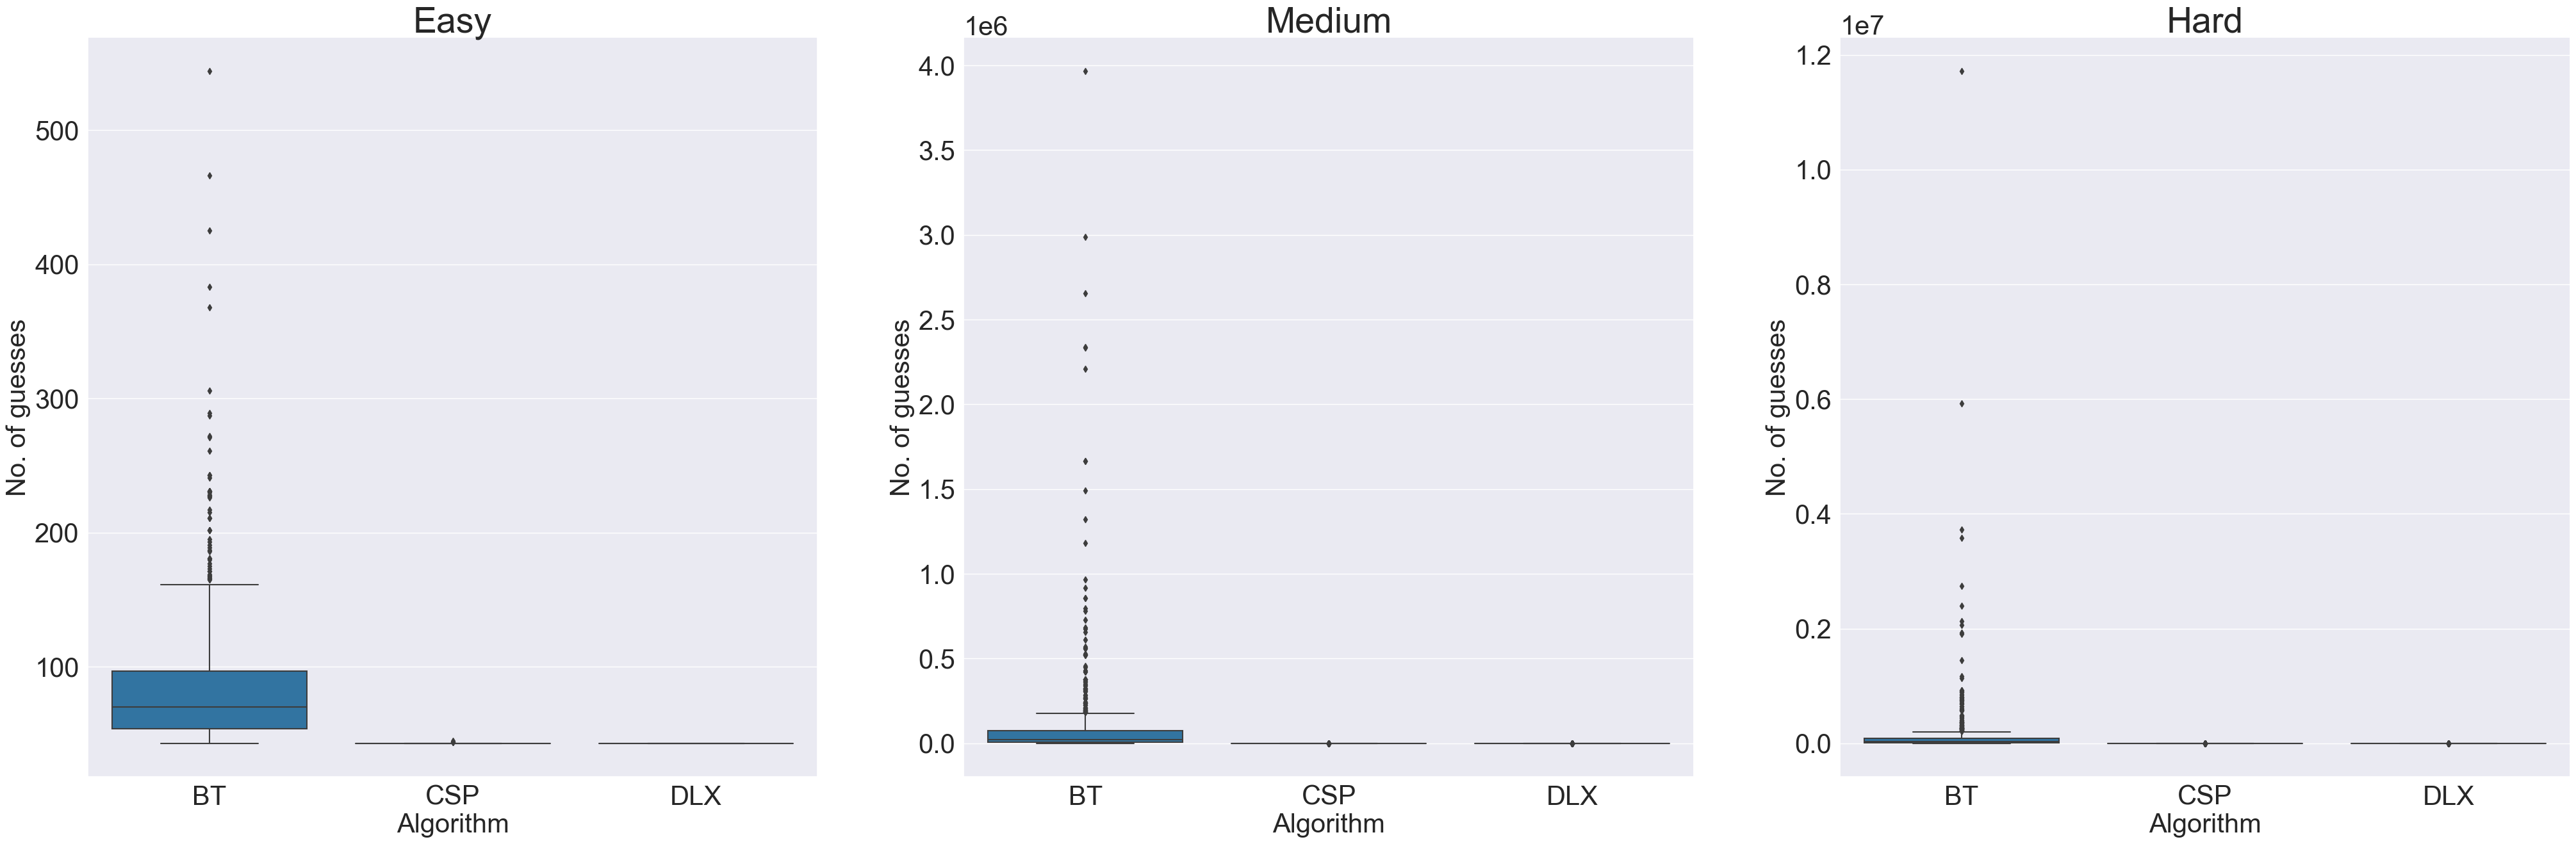

In [7]:
sns.set_context(
    "notebook", 
    rc={
        "axes.titlesize": 40,
        "axes.labelsize": 30,
        "axes.labelpad": 30,
        "xtick.labelsize": 30, 
        "ytick.labelsize": 30
    }
)

f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (50, 15))
ax_easy = sns.boxplot(
    data=df[df["difficulty"] == "Easy"][["BT", "CSP", "DLX"]],
    ax=ax[0]
)
ax_easy.set(
    xlabel="Algorithm",
    ylabel="No. of guesses",
    title="Easy"
)
ax_medium = sns.boxplot(
    data=df[df["difficulty"] == "Medium"][["BT", "CSP", "DLX"]],
    ax=ax[1]
)
ax_medium.set(
    xlabel="Algorithm",
    ylabel="No. of guesses",
    title="Medium"
)
ax_hard = sns.boxplot(
    data=df[df["difficulty"] == "Hard"][["BT", "CSP", "DLX"]],
    ax=ax[2]
)
ax_hard.set(
    xlabel="Algorithm",
    ylabel="No. of guesses",
    title="Hard"
)

[Text(0.5, 0, 'Algorithm'),
 Text(0, 0.5, 'No. of guesses'),
 Text(0.5, 1.0, 'Hard')]

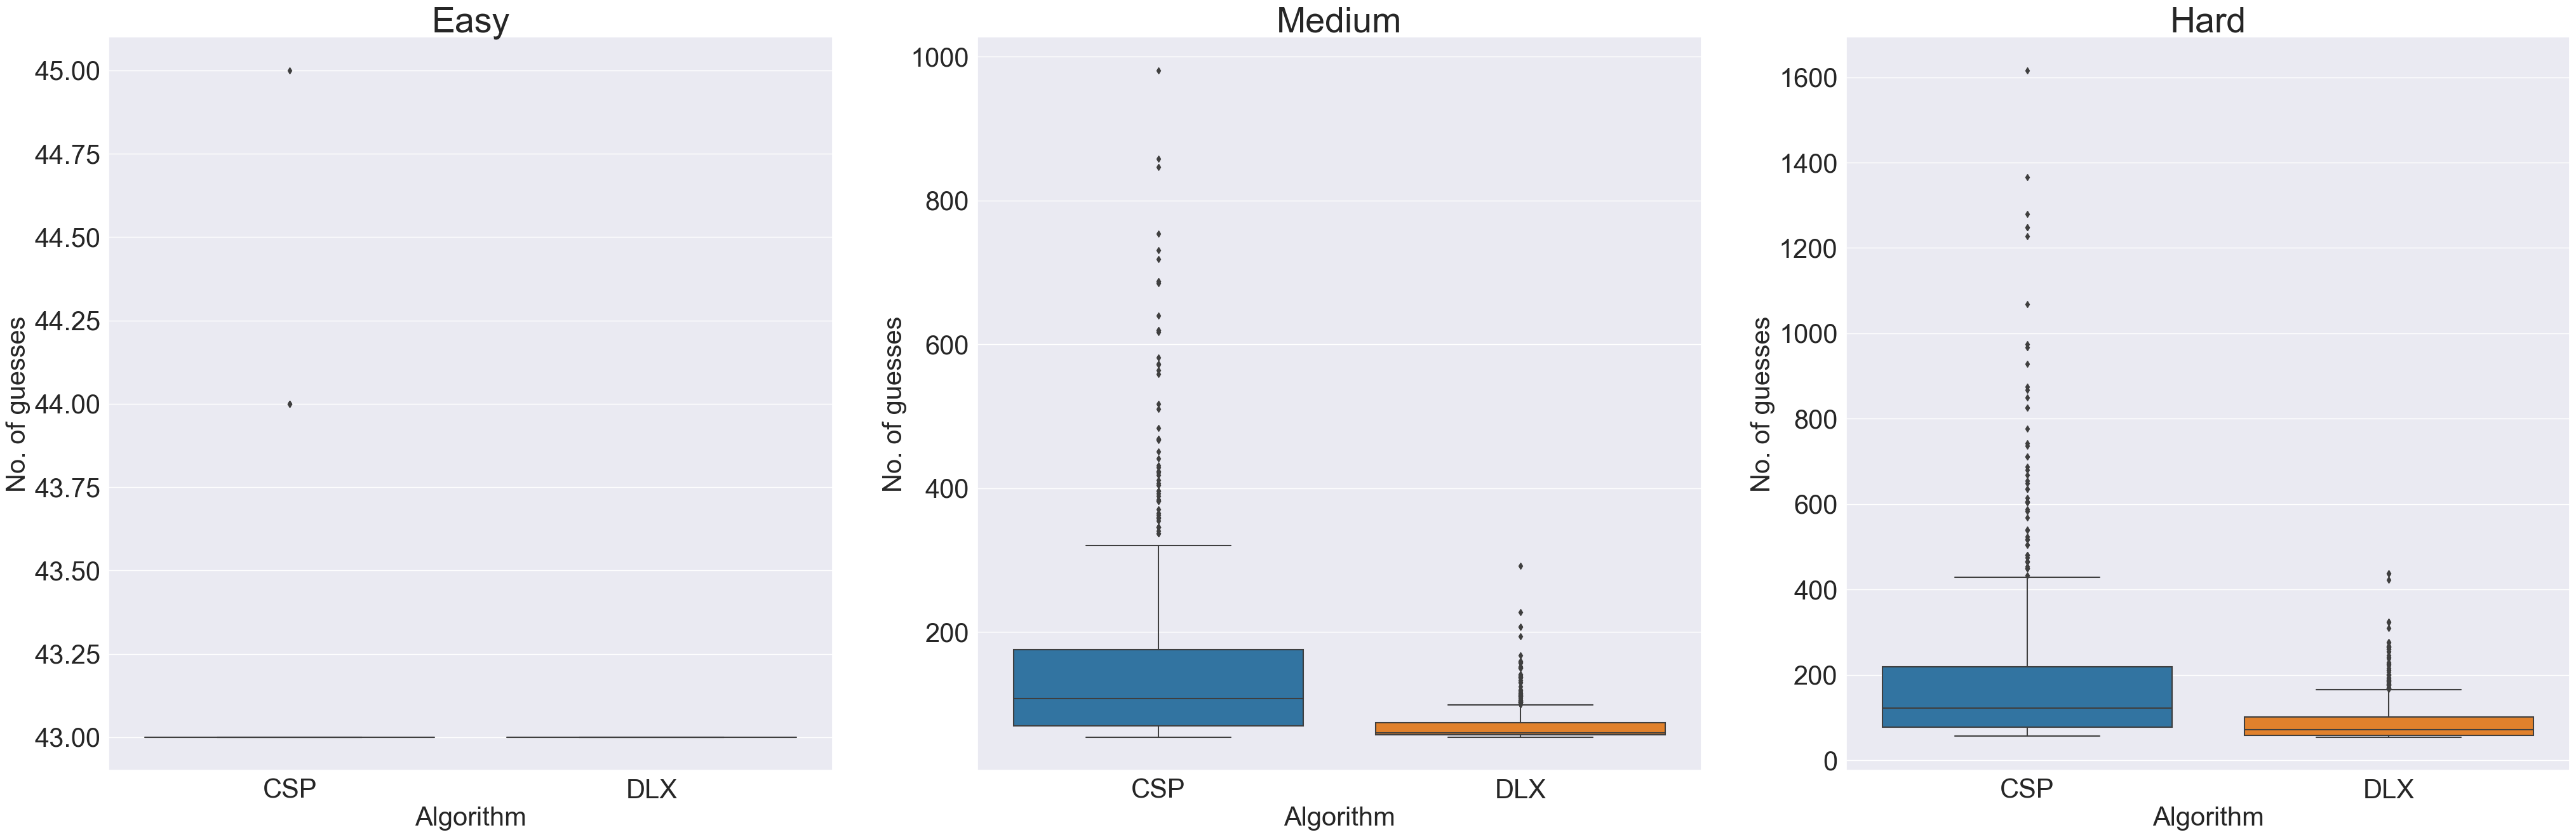

In [8]:
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (50, 15))
ax_easy = sns.boxplot(
    data=df[df["difficulty"] == "Easy"][["CSP", "DLX"]],
    ax=ax[0]
)
ax_easy.set(
    xlabel="Algorithm",
    ylabel="No. of guesses",
    title="Easy"
)
ax_medium = sns.boxplot(
    data=df[df["difficulty"] == "Medium"][["CSP", "DLX"]],
    ax=ax[1]
)
ax_medium.set(
    xlabel="Algorithm",
    ylabel="No. of guesses",
    title="Medium"
)
ax_hard = sns.boxplot(
    data=df[df["difficulty"] == "Hard"][["CSP", "DLX"]],
    ax=ax[2]
)
ax_hard.set(
    xlabel="Algorithm",
    ylabel="No. of guesses",
    title="Hard"
)

In [11]:
df[["difficulty", "BT", "CSP", "DLX"]].groupby(by="difficulty").mean()

,BT,CSP,DLX
difficulty,,,
Easy,86.375527,43.007032,43.000000
Hard,149788.274262,184.641350,90.929677
Medium,100910.762307,151.081575,70.133615


### AI Escargot

In [7]:
grid = [
    [1, 0, 0, 0, 0, 7, 0, 9, 0],
    [0, 3, 0, 0, 2, 0, 0, 0, 8],
    [0, 0, 9, 6, 0, 0, 5, 0, 0],
    [0, 0, 5, 3, 0, 0, 9, 0, 0],
    [0, 1, 0, 0, 8, 0, 0, 0, 2],
    [6, 0, 0, 0, 0, 4, 0, 0, 0],
    [3, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 4, 0, 0, 0, 0, 0, 0, 7],
    [0, 0, 7, 0, 0, 0, 3, 0, 0]
]

print(f"BT  Guesses: {bt.SudokuBT(grid).solve()[0]}")
print(f"CSP Guesses: {csp.SudokuCSP(grid).solve()[0]}")
print(f"DLX Guesses: {dlx.SudokuDLX(grid).solve()[0]}")

BT  Guesses: 8969
CSP Guesses: 414
DLX Guesses: 145
